### Statistical Tests :

### Objective :
* Data Loading
* Data Understanding
* Data Cleaning
* Data Pre-Processing
* Framing the Hypothesis
* Applying the appropriate Statistical Test.

DATA SET : TELECOM CHURN

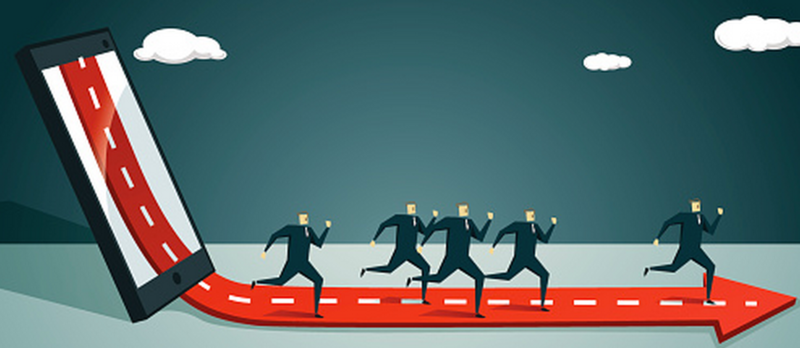

#### Variable Description :
* CustomerID: A unique ID that identifies each customer.

* Gender: The customer’s gender: Male, Female


* Senior Citizen: Indicates if the customer is 65 or older: Yes, No

* Married (Partner): Indicates if the customer is married: Yes, No

* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.


* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection : Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

* Tenure: Indicates the total amount of months that the customer has been with the company.

* Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Importing required Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
df=pd.read_csv('telecom.csv')

In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

Viewing the Data :

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Shape of the Train data :

In [6]:
print('Shape of the Train data :',df.shape)
print('No of Rows    :',df.shape[0])
print('No of columns :',df.shape[1])

Shape of the Train data : (7043, 21)
No of Rows    : 7043
No of columns : 21


Viewing the Data Types :

Viewing the info :

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that TotalCharges is a numeric column but the Data type it is showing is object data Type.

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Here we will consider SeniorCitizen as categorical Variable.

Checking the Null Values :

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values for the DataFrame.

In [10]:
# We will look in to the TotalCharges column :
df[df.TotalCharges==' ']['TotalCharges'].count()

11

we see that there are 11 observations where TotalCharges is having Null Values.

In [11]:
print("percentage of Missing :",round((11/df.shape[0])*100,2),'%')

percentage of Missing : 0.16 %


so with out loss of generality we can drop those observations from the Data set.

In [12]:
print("Shape Before Dropping :",df.shape)
df=df[~(df.TotalCharges==' ')]
print("Shape After Dropping :",df.shape)

Shape Before Dropping : (7043, 21)
Shape After Dropping : (7032, 21)


Univariate Analysis :

Viewing the columns :

In [13]:
for i in df.columns :
    print(i)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


Consider the Object columns:

In [14]:
objcols=df.select_dtypes('object')
objcols['SeniorCitizen']=df.SeniorCitizen
objcols.drop(['customerID','TotalCharges'],axis=1,inplace=True)
objcols.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0


Let's convert the Dtype of TotalCharges from object to float.

In [15]:
df.TotalCharges=df.TotalCharges.astype(float)

In [16]:
for i in objcols.columns :
    print(i,'has',objcols[i].nunique(),'levels ')
    print('Values:',objcols[i].unique())
    print('---------------------------------------------------')

gender has 2 levels 
Values: ['Female' 'Male']
---------------------------------------------------
Partner has 2 levels 
Values: ['Yes' 'No']
---------------------------------------------------
Dependents has 2 levels 
Values: ['No' 'Yes']
---------------------------------------------------
PhoneService has 2 levels 
Values: ['No' 'Yes']
---------------------------------------------------
MultipleLines has 3 levels 
Values: ['No phone service' 'No' 'Yes']
---------------------------------------------------
InternetService has 3 levels 
Values: ['DSL' 'Fiber optic' 'No']
---------------------------------------------------
OnlineSecurity has 3 levels 
Values: ['No' 'Yes' 'No internet service']
---------------------------------------------------
OnlineBackup has 3 levels 
Values: ['Yes' 'No' 'No internet service']
---------------------------------------------------
DeviceProtection has 3 levels 
Values: ['No' 'Yes' 'No internet service']
---------------------------------------------------

As we can observe that there are no duplicate levels present in the object columns.

In [17]:
objcols.shape

(7032, 17)

In [18]:
numcols=df.select_dtypes(np.number)
numcols.drop('SeniorCitizen',axis=1,inplace=True)
numcols.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


Look at for the outliers :

one of the ways to easily Identify the outliers is to draw Box-plots :

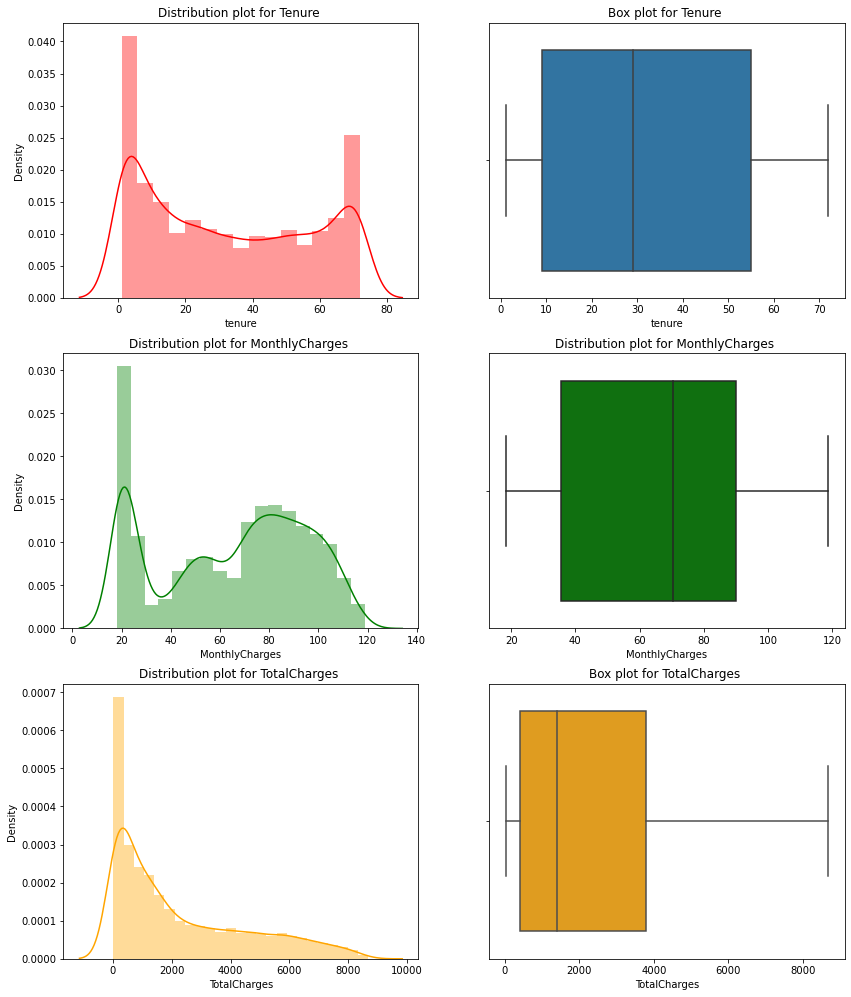

In [19]:
plt.figure(figsize=(14,13))
plt.subplot(3,2,1)
sns.distplot(df.tenure,kde=True,color='r')
plt.title('Distribution plot for Tenure ')

plt.subplot(3,2,2)
sns.boxplot(df.tenure)
plt.title('Box plot for Tenure ')

plt.subplot(3,2,3)
sns.distplot(df.MonthlyCharges,kde=True,color='g')
plt.title('Distribution plot for MonthlyCharges ')

plt.subplot(3,2,4)
sns.boxplot(df.MonthlyCharges,color='g')
plt.title('Distribution plot for MonthlyCharges ')

plt.subplot(3,2,5)
sns.distplot(df.TotalCharges,kde=True,color='orange')
plt.title('Distribution plot for TotalCharges ')

plt.subplot(3,2,6)
sns.boxplot(df.TotalCharges,color='orange')
plt.title('Box plot for TotalCharges ')

plt.subplots_adjust(top=2,bottom=1)
plt.show()

Let's look in to the statistical Test for Normality :

There are several Statistical Tests avilable to check whether the given data distribution is Guassian or not.

One of the Tests here we will use is  " D'Agostino and Pearson's Test ".

#### D'Agostino and Pearson's Test : Normality Test.

Any Hypothesis Testing consists of two Hypothesis statements based on our claim i) Null Hypothesis ii) Alternate Hypothesis

* Null Hypothesis H0 :
  *   The sample Distribution looks like Guassian(Normal) Distribution.
* Alternate Hypothesis Ha :
  *   The sample Distribution does not look like Guassian(Normal) Distribution.

In [20]:
from scipy.stats import normaltest

In scipy.stats the name of the D'Agostino and Pearson's Test is normaltest.

In [21]:
for i in numcols.columns :
    print(i)
    stat,p=normaltest(numcols[i])
    print('statistic value :',stat)
    print('P-Value  :',p)
    alpha=0.05
    if p < alpha :
        print("Reject Null Hypothesis :",i," Sample Distribution does not look like Normal Distribution")
    else :
        print("Fail to reject Null Hypothesis :",i,"Sample Distribution looks like Normal Distribution ")
    print("---------------------------------------------------------------------------------")

tenure
statistic value : 75799.50922160242
P-Value  : 0.0
Reject Null Hypothesis : tenure  Sample Distribution does not look like Normal Distribution
---------------------------------------------------------------------------------
MonthlyCharges
statistic value : 11233.887497848164
P-Value  : 0.0
Reject Null Hypothesis : MonthlyCharges  Sample Distribution does not look like Normal Distribution
---------------------------------------------------------------------------------
TotalCharges
statistic value : 805.9834407564911
P-Value  : 9.614342449421415e-176
Reject Null Hypothesis : TotalCharges  Sample Distribution does not look like Normal Distribution
---------------------------------------------------------------------------------


 Visually we can use Histogram,Q-Q plots. Here we used Histograms, by that also it is evident that they are not Normally distributed.
 
 Usually this test is more useful in Multiple Linear Regression Residual Analysis.

Let's see T-test :

#### Two-Sample T-Test :

A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same.

* For T-test we need to check the Means of two groups whether thay are different or not.
* Number of samples in each group whether they are equal or not
* Variances of the Two groups whether they are equal or not

In [22]:
# Let's see the Mean Values,Variance and Value-Counts of the Tenure for the churned and not churned cases.
for i in range(1,4):
    if i==1:
        print('Mean values of Tenure for Churn Yes/No Groups:\n') 
        print(pd.DataFrame(df.tenure.groupby(df.Churn).mean()).reset_index())
        
    elif i==2:
        print('-----------------------------------------------')
        print('Number of Samples for Churn Yes/No Groups :\n')
        print(pd.DataFrame(df.tenure.groupby(df.Churn).count()).reset_index())
    else :
        print('-----------------------------------------------')
        print('Variances of Two Churned Groups :\n')
        print(pd.DataFrame(df.tenure.groupby(df.Churn).var()).reset_index())    

Mean values of Tenure for Churn Yes/No Groups:

  Churn     tenure
0    No  37.650010
1   Yes  17.979133
-----------------------------------------------
Number of Samples for Churn Yes/No Groups :

  Churn  tenure
0    No    5163
1   Yes    1869
-----------------------------------------------
Variances of Two Churned Groups :

  Churn      tenure
0    No  579.699064
1   Yes  381.464768


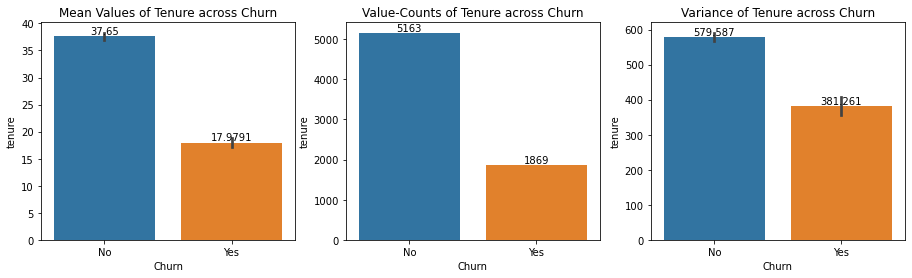

In [23]:
# Let's see the Mean Values,Variance and Value-Counts of the Tenure for the churned and not churned cases visually.
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
fig=sns.barplot(data=df,x='Churn',y='tenure',estimator=np.mean)
fig.bar_label(fig.containers[0])
plt.title("Mean Values of Tenure across Churn")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,x='Churn',y='tenure',estimator=np.count_nonzero)
fig.bar_label(fig.containers[0])
plt.title("Value-Counts of Tenure across Churn")

plt.subplot(1,3,3)
fig=sns.barplot(data=df,x='Churn',y='tenure',estimator=np.var)
fig.bar_label(fig.containers[0])
plt.title("Variance of Tenure across Churn")

plt.subplots_adjust(right=2,left=1)

* we see that the Mean values of two groups are different.
* Number of Samples for each group is different.
* Variances of two groups also are not equal.

So we will apply the 2-sample-Independent-Unequal Variance T-Test.

Framing the Null and Alternate Hypothesis :
* Null Hypothesis : There is No Statistical difference between the Means of the Two groups 
* Alternate Hypothesis :There is Statistical difference between the Means of the Two groups 

Importing the Test :

In [24]:
from scipy.stats import ttest_ind

In [25]:
# Applying the Test : Tenure vs Churn
stat,p=ttest_ind(df[df.Churn=='Yes']['tenure'],df[df.Churn=='No']['tenure'],equal_var=False)
print('T-statistic value :',stat)
print('P-Value  :',p)
alpha=0.05
if p < alpha :
      print("Reject Null Hypothesis :==> There is Statistical difference between the Average Tenure of the Two groups")
else :
     print("Fail to reject Null Hypothesis :==> There is No Statistical difference between the Average Tenure of the Two groups ")

T-statistic value : -34.971870097503476
P-Value  : 2.347074718895754e-234
Reject Null Hypothesis :==> There is Statistical difference between the Average Tenure of the Two groups


-------------------------------------------------------------------

Let's apply the T-Test for Average MonthlyCharges and TotalCharges vs Churn group :

In [26]:
# Let's see the Mean Values,Variance and Value-Counts of the MonthlyCharges for the churned and not churned cases.
for i in range(1,4):
    if i==1:
        print('Mean values of MonthlyCharges for Churn Yes/No Groups:\n') 
        print(pd.DataFrame(df.MonthlyCharges.groupby(df.Churn).mean()).reset_index())
        
    elif i==2:
        print('-----------------------------------------------')
        print('Number of Samples for Churn Yes/No Groups :\n')
        print(pd.DataFrame(df.MonthlyCharges.groupby(df.Churn).count()).reset_index())
    else :
        print('-----------------------------------------------')
        print('Variances of Two Churned Groups :\n')
        print(pd.DataFrame(df.MonthlyCharges.groupby(df.Churn).var()).reset_index())  

Mean values of MonthlyCharges for Churn Yes/No Groups:

  Churn  MonthlyCharges
0    No       61.307408
1   Yes       74.441332
-----------------------------------------------
Number of Samples for Churn Yes/No Groups :

  Churn  MonthlyCharges
0    No            5163
1   Yes            1869
-----------------------------------------------
Variances of Two Churned Groups :

  Churn  MonthlyCharges
0    No      966.871469
1   Yes      608.414183


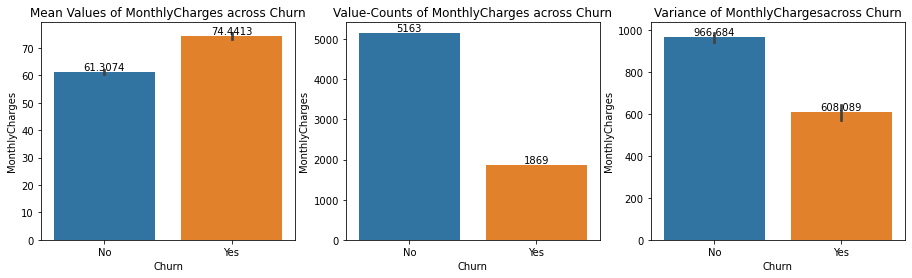

In [27]:
# Let's see the Mean Values,Variance and Value-Counts of the MonthlyCharges for the churned and not churned cases visually.
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
fig=sns.barplot(data=df,x='Churn',y='MonthlyCharges',estimator=np.mean)
fig.bar_label(fig.containers[0])
plt.title("Mean Values of MonthlyCharges across Churn")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,x='Churn',y='MonthlyCharges',estimator=np.count_nonzero)
fig.bar_label(fig.containers[0])
plt.title("Value-Counts of MonthlyCharges across Churn")

plt.subplot(1,3,3)
fig=sns.barplot(data=df,x='Churn',y='MonthlyCharges',estimator=np.var)
fig.bar_label(fig.containers[0])
plt.title("Variance of MonthlyChargesacross Churn")

plt.subplots_adjust(right=2,left=1)

* we see that the Mean values of two groups are different.
* Number of Samples for each group is different.
* Variances of two groups also are not equal.

So we will apply the 2-sample-Independent-Unequal Variance T-Test.

Framing the Null and Alternate Hypothesis :
* Null Hypothesis : There is No Statistical difference between the Average MonthlyCharges of the Two groups 
* Alternate Hypothesis :There is Statistical difference between the Average MonthlyCharges of the Two groups 


In [28]:
# Applying the T-Test : MonthlyCharges  vs Churn
stat,p=ttest_ind(df[df.Churn=='Yes']['MonthlyCharges'],df[df.Churn=='No']['MonthlyCharges'],equal_var=False)
print('T-statistic value :',stat)
print('P-Value  :',p)
alpha=0.05
if p < alpha :
      print("Reject Null Hypothesis :==> There is Statistical difference between the Average MonthlyCharges of the Two groups")
else :
     print("Fail to reject Null Hypothesis :==> There is No Statistical difference between the Average MonthlyCharges of the Two groups ")

T-statistic value : 18.34091879095257
P-Value  : 2.657357144516026e-72
Reject Null Hypothesis :==> There is Statistical difference between the Average MonthlyCharges of the Two groups


-----------------------------------------------------------------------------------------------

In [29]:
# Let's see the Mean Values,Variance and Value-Counts of the TotalCharges for the churned and not churned cases.
for i in range(1,4):
    if i==1:
        print('Mean values of TotalCharges for Churn Yes/No Groups:\n') 
        print(pd.DataFrame(df.TotalCharges.groupby(df.Churn).mean()).reset_index())
    elif i==2:
        print('-----------------------------------------------')
        print('Number of Samples for Churn Yes/No Groups :\n')
        print(pd.DataFrame(df.TotalCharges.groupby(df.Churn).count()).reset_index())
    else :
        print('-----------------------------------------------')
        print('Variances of Two Churned Groups :\n')
        print(pd.DataFrame(df.TotalCharges.groupby(df.Churn).var()).reset_index()) 

Mean values of TotalCharges for Churn Yes/No Groups:

  Churn  TotalCharges
0    No   2555.344141
1   Yes   1531.796094
-----------------------------------------------
Number of Samples for Churn Yes/No Groups :

  Churn  TotalCharges
0    No          5163
1   Yes          1869
-----------------------------------------------
Variances of Two Churned Groups :

  Churn  TotalCharges
0    No  5.426370e+06
1   Yes  3.575212e+06


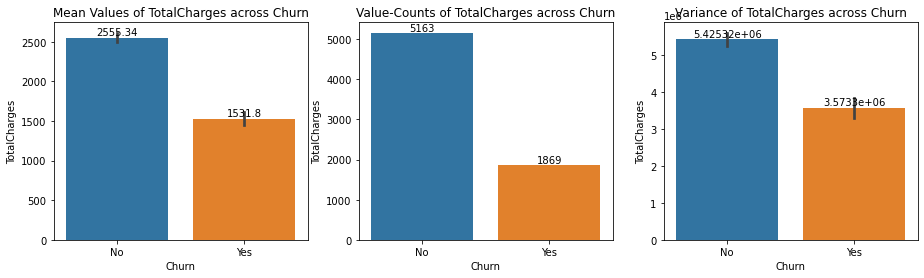

In [30]:
# Let's see the Mean Values,Variance and Value-Counts of the TotalCharges for the churned and not churned cases visually.
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
fig=sns.barplot(data=df,x='Churn',y='TotalCharges',estimator=np.mean)
fig.bar_label(fig.containers[0])
plt.title("Mean Values of TotalCharges across Churn")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,x='Churn',y='TotalCharges',estimator=np.count_nonzero)
fig.bar_label(fig.containers[0])
plt.title("Value-Counts of TotalCharges across Churn")

plt.subplot(1,3,3)
fig=sns.barplot(data=df,x='Churn',y='TotalCharges',estimator=np.var)
fig.bar_label(fig.containers[0])
plt.title("Variance of TotalCharges across Churn")

plt.subplots_adjust(right=2,left=1)

* we see that the Mean values of two groups are different.
* Number of Samples for each group is different.
* Variances of two groups also are not equal.

So we will apply the 2-sample-Independent-Unequal Variance T-Test.

Framing the Null and Alternate Hypothesis :
* Null Hypothesis : There is No Statistical difference between the Average MonthlyCharges of the Two groups 
* Alternate Hypothesis :There is Statistical difference between the Average MonthlyCharges of the Two groups

In [31]:
# Applying the T-Test : TotalCharges  vs Churn
stat,p=ttest_ind(df[df.Churn=='Yes']['TotalCharges'],df[df.Churn=='No']['TotalCharges'],equal_var=False)
print('T-statistic value :',stat)
print('P-Value  :',p)
alpha=0.05
if p < alpha :
      print("Reject Null Hypothesis :==> There is Statistical difference between the Average TotalCharges of the Two groups")
else :
     print("Fail to reject Null Hypothesis :==> There is No Statistical difference between the Average TotalCharges of the Two groups ")

T-statistic value : -18.80076821738761
P-Value  : 1.1524944112838114e-75
Reject Null Hypothesis :==> There is Statistical difference between the Average TotalCharges of the Two groups


Let's see ANOVA Test :

#### ANOVA :

Upto now we have two groups, but for more than two groups we need to apply Anova Test.

ANOVA stands for Analysis of Variance, is a statistical test used to analyze the difference between the means of more than two groups.

A one-way ANOVA uses one independent variable

Use a one-way ANOVA when you have collected data about one categorical independent variable and one quantitative dependent variable. The independent variable should have at least three levels (i.e. at least three different groups or categories).

ANOVA tells you if the dependent variable changes according to the level of the independent variable.

* The Null Hypothesis of ANOVA (H0) : There is no difference among group means. 
* The Alternate hypothesis     (Ha) : There is at least one group differs significantly from the overall mean of the dependent variable.

Let's apply the ANOVA test to the TotalCharges vs contract and TotalCharges vs Payment_method.

In [32]:
# Let's see the Mean values , Number of Samples ,Variances of TotalCharges among the Contract levels.
for i in range(1,4):
    if i==1:
        print('Mean values of TotalCharges for Contract Type:\n') 
        print(pd.DataFrame(df.TotalCharges.groupby(df.Contract).mean()).reset_index())
    elif i==2:
        print('-----------------------------------------------')
        print('Number of Samples for Contract Groups :\n')
        print(pd.DataFrame(df.TotalCharges.groupby(df.Contract).count()).reset_index())
    else :
        print('-----------------------------------------------')
        print('Variances of the Contract Groups :\n')
        print(pd.DataFrame(df.TotalCharges.groupby(df.Contract).var()).reset_index()) 

Mean values of TotalCharges for Contract Type:

         Contract  TotalCharges
0  Month-to-month   1369.254581
1        One year   3034.683084
2        Two year   3728.933947
-----------------------------------------------
Number of Samples for Contract Groups :

         Contract  TotalCharges
0  Month-to-month          3875
1        One year          1472
2        Two year          1685
-----------------------------------------------
Variances of the Contract Groups :

         Contract  TotalCharges
0  Month-to-month  2.604605e+06
1        One year  4.971696e+06
2        Two year  6.611341e+06


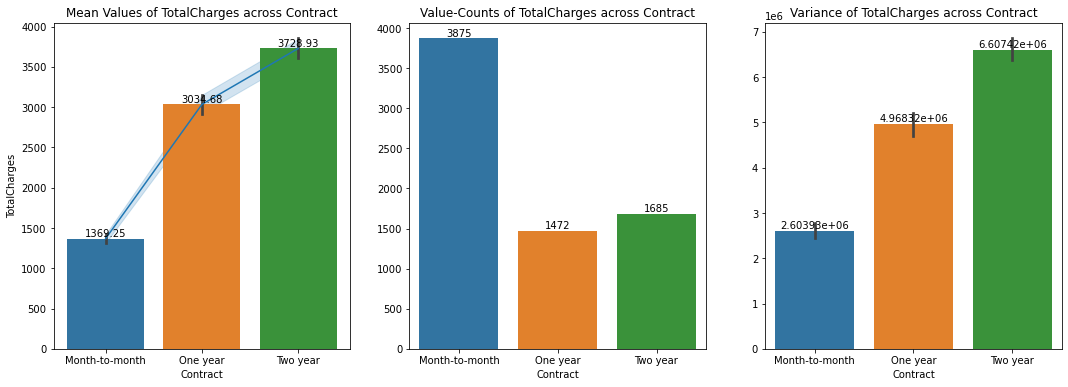

In [33]:
# Let's see the Mean Values,Variance and Value-Counts of the TotalCharges for the Contract groups visually.
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
fig=sns.barplot(data=df,x='Contract',y='TotalCharges',estimator=np.mean)
fig.bar_label(fig.containers[0])
sns.lineplot(data=df,x='Contract',y='TotalCharges',estimator=np.mean)
plt.title("Mean Values of TotalCharges across Contract")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,x='Contract',y='TotalCharges',estimator=np.count_nonzero)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Value-Counts of TotalCharges across Contract")

plt.subplot(1,3,3)
fig=sns.barplot(data=df,x='Contract',y='TotalCharges',estimator=np.var)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Variance of TotalCharges across Contract")

plt.subplots_adjust(right=2,left=1)

Importing the Anova Test :

In [34]:
from scipy.stats import f_oneway

In [35]:
# Applying the Test : Contract Vs TotalCharges
stat,p= f_oneway(df[df.Contract=='Month-to-month']['TotalCharges'],
          df[df.Contract=='One year']['TotalCharges'],
           df[df.Contract=='Two year']['TotalCharges'])
print('F-statistic value :',stat)
print('P-Value  :',p)
alpha=0.05
if p < alpha :
      print("Reject Null Hypothesis :==> There is atleast one Contract group differs significantly from the overall mean of the TotalCharges ")
else :
     print("Fail to reject Null Hypothesis :==> There is No Statistical difference between the Average TotalCharges among the Contract groups ")

F-statistic value : 934.7434391036368
P-Value  : 0.0
Reject Null Hypothesis :==> There is atleast one Contract group differs significantly from the overall mean of the TotalCharges 


TotalCharges vs Payment_method :

In [36]:
# Let's see the Mean values , Number of Samples ,Variances of TotalCharges among the Payment Methods.
for i in range(1,4):
    if i==1:
        print('Mean values of TotalCharges for PaymentMethod:\n') 
        print(pd.DataFrame(df.TotalCharges.groupby(df.PaymentMethod).mean()).reset_index())
    elif i==2:
        print('-----------------------------------------------')
        print('Number of Samples for PaymentMethod Groups :\n')
        print(pd.DataFrame(df.TotalCharges.groupby(df.PaymentMethod).count()).reset_index())
    else :
        print('-----------------------------------------------')
        print('Variances of the PaymentMethod Groups :\n')
        print(pd.DataFrame(df.TotalCharges.groupby(df.PaymentMethod).var()).reset_index()) 

Mean values of TotalCharges for PaymentMethod:

               PaymentMethod  TotalCharges
0  Bank transfer (automatic)   3079.299546
1    Credit card (automatic)   3071.396022
2           Electronic check   2090.868182
3               Mailed check   1054.483915
-----------------------------------------------
Number of Samples for PaymentMethod Groups :

               PaymentMethod  TotalCharges
0  Bank transfer (automatic)          1542
1    Credit card (automatic)          1521
2           Electronic check          2365
3               Mailed check          1604
-----------------------------------------------
Variances of the PaymentMethod Groups :

               PaymentMethod  TotalCharges
0  Bank transfer (automatic)  5.558917e+06
1    Credit card (automatic)  5.795587e+06
2           Electronic check  4.645901e+06
3               Mailed check  2.081871e+06


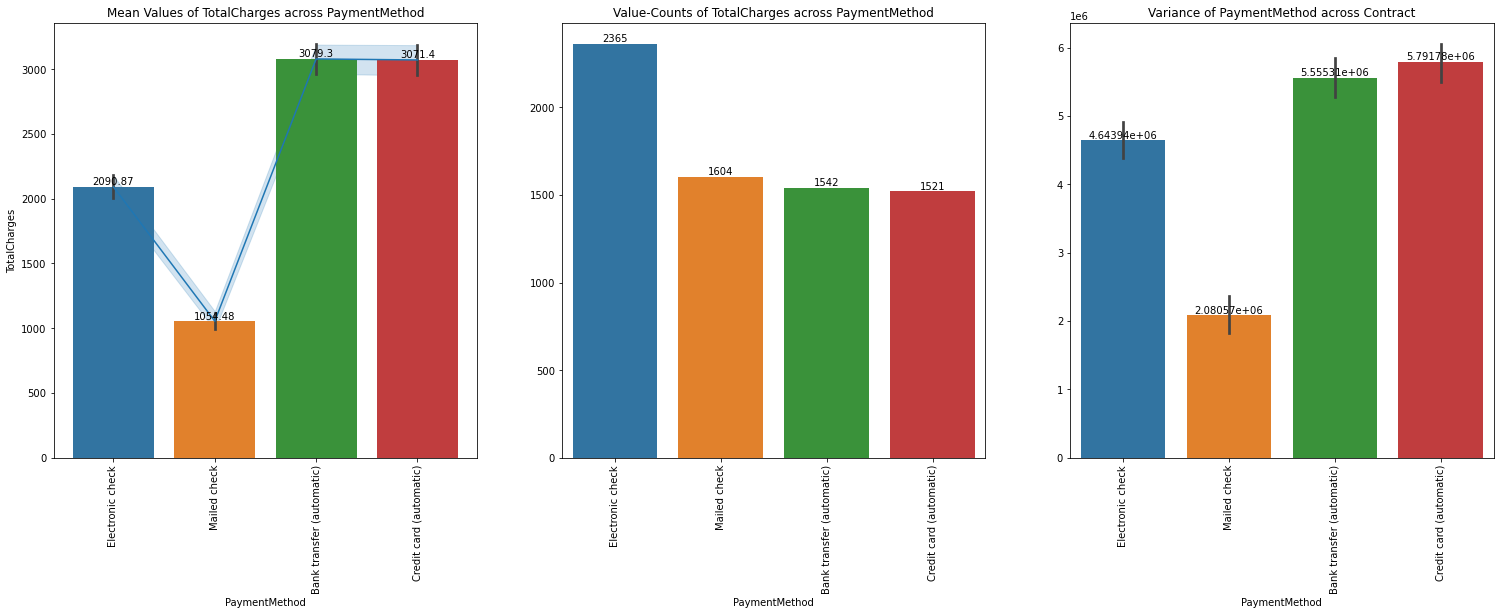

In [37]:
# Let's see the Mean Values,Variance and Value-Counts of the TotalCharges for the Contract groups visually.
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
fig=sns.barplot(data=df,x='PaymentMethod',y='TotalCharges',estimator=np.mean)
fig.bar_label(fig.containers[0])
sns.lineplot(data=df,x='PaymentMethod',y='TotalCharges',estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Mean Values of TotalCharges across PaymentMethod")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,x='PaymentMethod',y='TotalCharges',estimator=np.count_nonzero)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.xticks(rotation=90)
plt.title("Value-Counts of TotalCharges across PaymentMethod")

plt.subplot(1,3,3)
fig=sns.barplot(data=df,x='PaymentMethod',y='TotalCharges',estimator=np.var)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.xticks(rotation=90)
plt.title("Variance of PaymentMethod across Contract")

plt.subplots_adjust(right=2,left=1)

In [38]:
# Applying the Test : PaymentMethod Vs TotalCharges
stat,p= f_oneway(df[df.PaymentMethod=='Electronic check']['TotalCharges'],
          df[df.PaymentMethod=='Mailed check']['TotalCharges'],
           df[df.PaymentMethod=='Bank transfer (automatic)']['TotalCharges'],
            df[df.PaymentMethod=='Credit card (automatic)']['TotalCharges']    )
print('F-statistic value :',stat)
print('P-Value  :',p)
alpha=0.05
if p < alpha :
      print("Reject Null Hypothesis :==> There is atleast one PaymentMethod group differs significantly from the overall mean of the TotalCharges ")
else :
     print("Fail to reject Null Hypothesis :==> There is No Statistical difference between the Average TotalCharges among the PaymentMethod groups ")

F-statistic value : 327.5236826310482
P-Value  : 4.608039633507195e-199
Reject Null Hypothesis :==> There is atleast one PaymentMethod group differs significantly from the overall mean of the TotalCharges 


* when we want to perform a Statistical test on two Variables in which one is Numeric and the other one is Categorical with exactly two levels then we will apply 2-Sample-Independent T-Test.
* If the categorical variable has more than two levels we will apply F-One-Way-ANOVA.

-------------------------------------------------------------------

#### Chi-Square Test :

Now consider two categorical Variables , suppose if we want to know the Association between Two categorical Variables we have to use Chi-Square Test.

Chi-Square can be used to test whether two variables are related or independent from one another.

Example : Whether the 'Gender' column is associated with 'Churn' column or not.

Chi-Square Test takes the Input as contingency table means Table which shows counts of cases of one Categorical variable contingent on the value of another. In simple words , It is a cross-tabulation.

Importing the Chi-Square Test :

In [39]:
from scipy.stats import chi2_contingency

chi2_contingency returns :
* chi2 -- The Test Statistic
* p    -- The p-value of the Test.
* dof  -- Degrees of Freedom
* ndarray-- The expected frequencies, based on the Marginal sum of the table.

Let's see the Association between the Gender and the Churn Variables.

In [40]:
# Cross-Tabulation of Gender VS Churn.
pd.DataFrame(pd.crosstab(df.gender,df.Churn)).reset_index()

Churn,gender,No,Yes
0,Female,2544,939
1,Male,2619,930


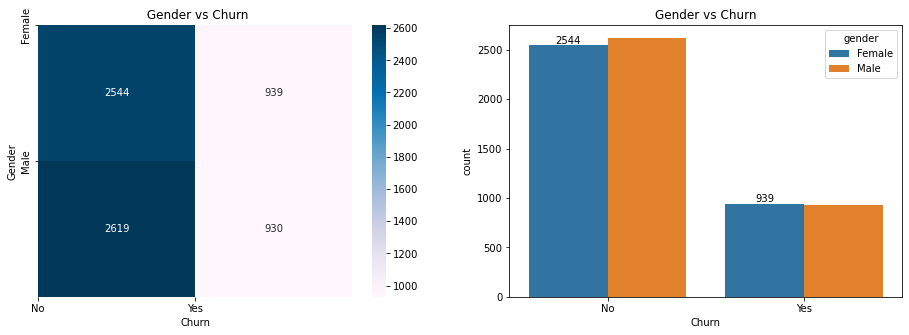

In [41]:
# Gender vs Churn :
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
fig=sns.heatmap(pd.crosstab(df.gender,df.Churn).values,annot=True,fmt='d',cmap='PuBu')
plt.xlabel('Churn')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['Female','Male'],)
plt.ylabel('Gender')
plt.title(" Gender vs Churn")

plt.subplot(1,2,2)
fig=sns.countplot(data=df,x='Churn',hue='gender')
fig.bar_label(fig.containers[0])
plt.title("Gender vs Churn")

plt.subplots_adjust(right=2,left=1)
plt.show()

* Framing the Hypothesis :
     * Null-Hypothesis H0 : There is no association between the Gender and Churn variables.
     * Alternate Hypothesis Ha : There is association between the Gender and Churn variables.

In [42]:
# Applying the Test :
stat,p,dof,array=chi2_contingency(pd.crosstab(df.gender,df.Churn))
print("Test Statistic :",stat,'\n')
print("p-value :",p,'\n')
alpha=0.05
if p < alpha :
    print("Reject Null :==> There is association between Gender and Churn Variables.")
else :
    print("Fail to Reject Null :==> There is no association between Gender and Churn Variables.")

Test Statistic : 0.47545453727386294 

p-value : 0.4904884707065509 

Fail to Reject Null :==> There is no association between Gender and Churn Variables.


Now Let's see the Association between the PaymentMethod and the Churn Variables.

In [43]:
# Cross-Tabulation of PaymentMethod VS Churn.
pd.DataFrame(pd.crosstab(df.PaymentMethod,df.Churn)).reset_index()

Churn,PaymentMethod,No,Yes
0,Bank transfer (automatic),1284,258
1,Credit card (automatic),1289,232
2,Electronic check,1294,1071
3,Mailed check,1296,308


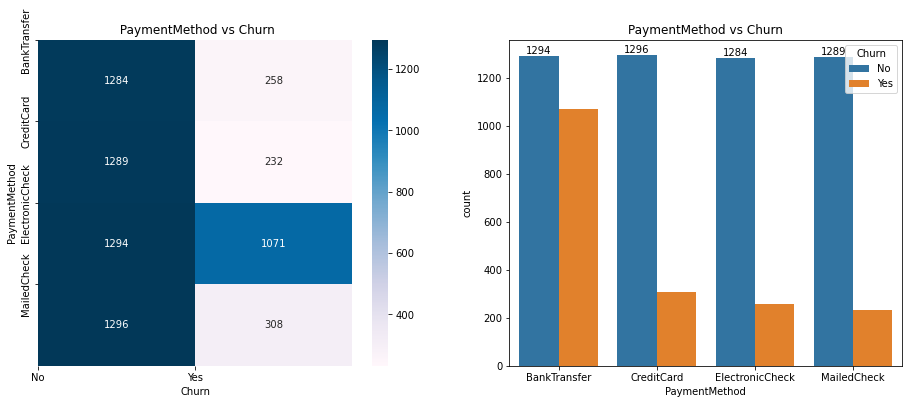

In [44]:
# PaymentMethod vs Churn :
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig=sns.heatmap(pd.crosstab(df.PaymentMethod,df.Churn).values,annot=True,fmt='d',cmap='PuBu')
plt.xlabel('Churn')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1,2,3],['BankTransfer','CreditCard','ElectronicCheck','MailedCheck'],rotation=90)
plt.ylabel('PaymentMethod')
plt.title(" PaymentMethod vs Churn")

plt.subplot(1,2,2)
fig=sns.countplot(data=df,x='PaymentMethod',hue='Churn')
fig.bar_label(fig.containers[0])
plt.xticks([0,1,2,3],['BankTransfer','CreditCard','ElectronicCheck','MailedCheck'])
plt.title("PaymentMethod vs Churn")

plt.subplots_adjust(right=2,left=1)
plt.show()

* Framing the Hypothesis :
     * Null-Hypothesis H0 : There is no association between the PaymentMethod and Churn variables.
     * Alternate Hypothesis Ha : There is association between the PaymentMethod and Churn variables.

In [45]:
# Applying the Test :
stat,p,dof,array=chi2_contingency(pd.crosstab(df.PaymentMethod,df.Churn))
print("Test Statistic :",stat,'\n')
print("p-value :",p,'\n')
alpha=0.05
if p < alpha :
    print("Reject Null :==> There is association between PaymentMethod and Churn Variables.")
else :
    print("Fail to Reject Null :==> There is no association between PaymentMethod and Churn Variables.")

Test Statistic : 645.4299001234638 

p-value : 1.4263098511063342e-139 

Reject Null :==> There is association between PaymentMethod and Churn Variables.


Let's see the Association between the Contract and the Churn Variables.

In [46]:
# Cross-Tabulation of Contract VS Churn.
pd.DataFrame(pd.crosstab(df.Contract,df.Churn)).reset_index()

Churn,Contract,No,Yes
0,Month-to-month,2220,1655
1,One year,1306,166
2,Two year,1637,48


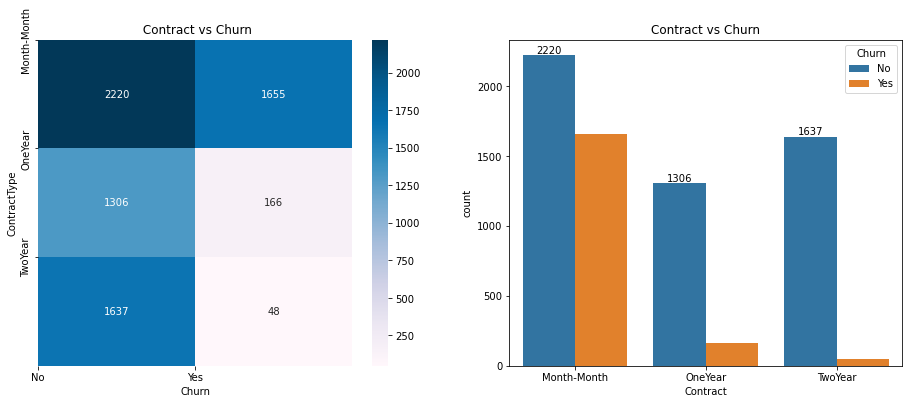

In [47]:
# Contract vs Churn :
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig=sns.heatmap(pd.crosstab(df.Contract,df.Churn).values,annot=True,fmt='d',cmap='PuBu')
plt.xlabel('Churn')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1,2],['Month-Month','OneYear','TwoYear'],rotation=90)
plt.ylabel('ContractType')
plt.title(" Contract vs Churn")

plt.subplot(1,2,2)
fig=sns.countplot(data=df,x='Contract',hue='Churn')
fig.bar_label(fig.containers[0])
plt.xticks([0,1,2],['Month-Month','OneYear','TwoYear'])
plt.title("Contract vs Churn")

plt.subplots_adjust(right=2,left=1)
plt.show()

* Framing the Hypothesis :
     * Null-Hypothesis H0 : There is no association between the Contract and Churn variables.
     * Alternate Hypothesis Ha : There is association between the Contract and Churn variables.

In [48]:
# Applying the Test :
stat,p,dof,array=chi2_contingency(pd.crosstab(df.Contract,df.Churn))
print("Test Statistic :",stat,'\n')
print("p-value :",p,'\n')
alpha=0.05
if p < alpha :
    print("Reject Null :==> There is association between Contract and Churn Variables.")
else :
    print("Fail to Reject Null :==> There is no association between Contract and Churn Variables.")

Test Statistic : 1179.5458287339445 

p-value : 7.326182186265472e-257 

Reject Null :==> There is association between Contract and Churn Variables.


when we want to know the association between Two Categorical Variables we do Chi-Square Test.

----------------------

#### Paired Sample T-Test :

The paired sample t-test, sometimes called the dependent sample t-test, is a statistical procedure used to determine whether the mean difference between two sets of observations is zero.

In a paired sample t-test, each subject or entity is measured twice, resulting in pairs of observations.

Example: There may be instances where the same patients are repeatedly tested before and after receiving a particular treatment. Each patient is being used as a control sample against themselves.

Importing the Test :

In [49]:
from scipy.stats import ttest_rel

Paired Sample T-test takes the Input as two arrays which need to be evaluated and it results in Test-statistic and p-value.

Let's take some sample data :

suppose we are having the patient's data measure who are taking new drug and placebo :

In [50]:
a=np.array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,16.4, 17.3, 15.2, 10.4, 10.4])
b=np.array([14.7, 32.4, 30.4, 33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26. ,30.4, 15.8, 19.7, 15. , 21.4])

In [51]:
patients=pd.DataFrame({'A_group':a,'B_group':b})
patients

,A_group,B_group
0,21.0,14.7
1,21.0,32.4
2,22.8,30.4
3,21.4,33.9
4,18.7,21.5
5,18.1,15.5
6,14.3,15.2
7,24.4,13.3
8,22.8,19.2
9,19.2,27.3


In [52]:
#let's see Means,Number of Samples,Variances of two groups :
for i in range(1,4):
    if i==1:
        print("Mean Values of Two Groups:\n")
        print("A-Group Mean value  :",a.mean())
        print("B-Group Mean value  :",b.mean())
        print('------------------------------------------\n')
    if i==2:
        print("Number of Samples of Two Groups :\n")
        print("A-Group  :",a.shape[0])
        print("B-Group  :",b.shape[0])
        print('------------------------------------------\n')
    if i==3:
        print("Variance Values of Two Groups :\n")
        print("A-Group   :",a.var())
        print("B-Group   :",b.var())

Mean Values of Two Groups:

A-Group Mean value  : 18.200000000000003
B-Group Mean value  : 21.98125
------------------------------------------

Number of Samples of Two Groups :

A-Group  : 16
B-Group  : 16
------------------------------------------

Variance Values of Two Groups :

A-Group   : 16.127499999999998
B-Group   : 47.10152343749999


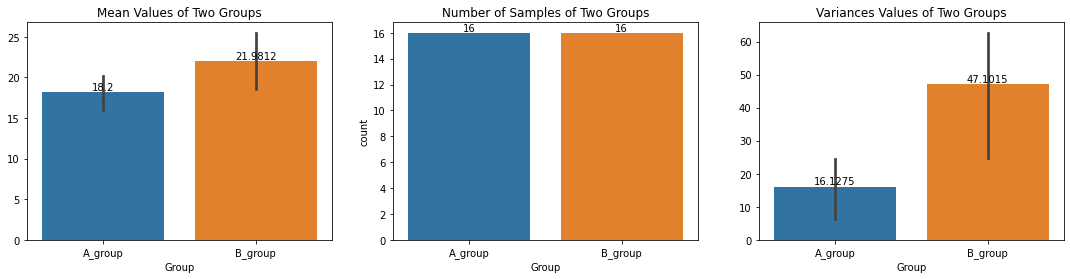

In [53]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
fig=sns.barplot(data=patients,estimator=np.mean)
fig.bar_label(fig.containers[0])
plt.xlabel("Group")
plt.title("Mean Values of Two Groups")

plt.subplot(1,3,2)
fig=sns.countplot(data=patients)
fig.bar_label(fig.containers[0])
plt.xlabel("Group")
plt.title("Number of Samples of Two Groups")

plt.subplot(1,3,3)
fig=sns.barplot(data=patients,estimator=np.var)
fig.bar_label(fig.containers[0])
plt.xlabel("Group")
plt.title("Variances Values of Two Groups")

plt.subplots_adjust(right=2,left=0.8)
plt.show()

Framing the Null and Alternate Hypothesis :
* Null Hypothesis : There is No Statistical difference between the Average values of the Two groups 
* Alternate Hypothesis :There is Statistical difference between the Average values of the Two groups 

In [54]:
#Applying the PairedsSample T-test :
stat,p=ttest_rel(patients.A_group,patients.B_group)
print('T-statistic value :',stat)
print('P-Value  :',p)
alpha=0.05
if p < alpha :
      print("Reject Null Hypothesis :==> There is Statistical difference between the Average values of the Two groups")
else :
     print("Fail to reject Null Hypothesis :==> There is No Statistical difference between the Average values of the Two groups ")

T-statistic value : -2.07109614621347
P-Value  : 0.056013753231395846
Fail to reject Null Hypothesis :==> There is No Statistical difference between the Average values of the Two groups 


Thus we conclude that there is no statistical difference between the Average values of the Two groups control group and Test group.

Here we performed some of the Statistical Hypothesis Testing based on the nature of the data types of the Columns and the Number of levels present in the Categorical Variable.

###    -----------------------------------------------------------------------------------------------------------------------------------------

#### Conclusion :

* To know whether the given Numeric column is Normally distributed or not we will perform "D'Agostino and Pearson's Test"(Normality Test).

* To know whether the Mean values of one Numeric variable are statistically different or not for two groups of Categorical variable we will use "2-Sample-Independent T-Test".  (one Numeric column vs one categorical with exactly 2 levels).

* To know whether the Mean values of one Numeric variable are statistically different or not for more than two groups of Categorical variable we will use "f-oneway ANOVA".  (one Numeric column vs one categorical with more than 2 levels).

* To know whether there is an association between the Two categorical variables we will use "CHI-SQUARE Test".

* To know whether if there is a change in the Mean value for the same group before and after the group undergoes  some process we will apply "Paired Sample T-Test".